First few rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Last few rows of the dataset:
       age           job   marital  education def

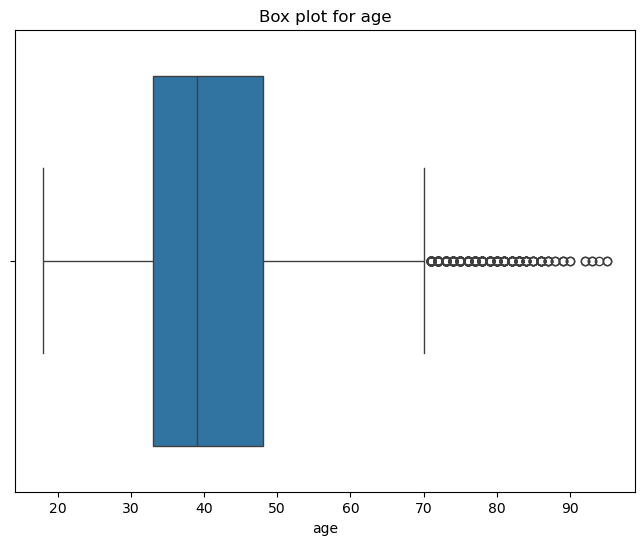

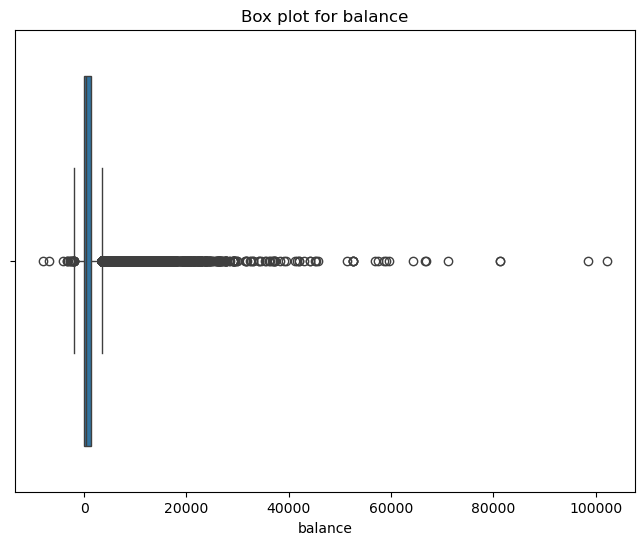


Removing outliers from 'age' column:

Visualizing 'age' and 'balance' columns after outlier removal:


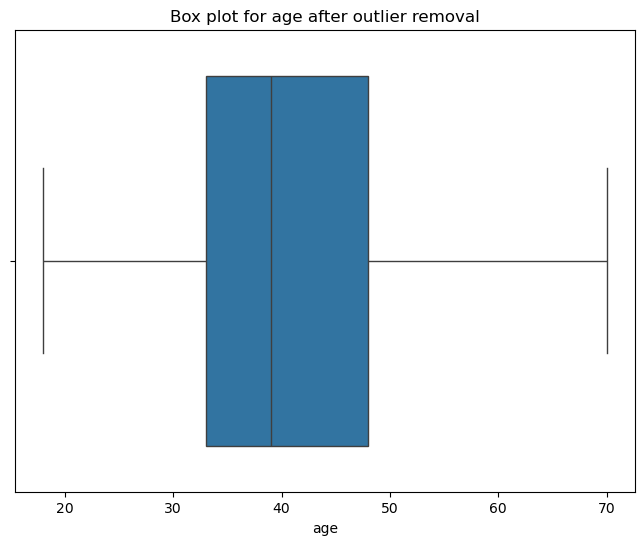

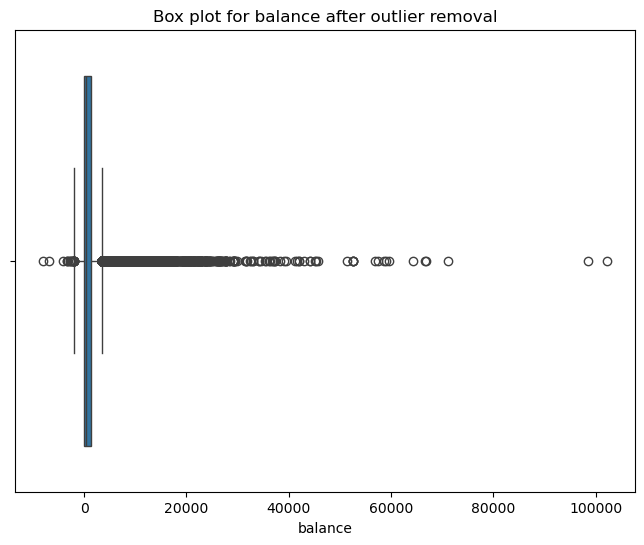


Feature Engineering:

Job column value counts:
job
blue-collar      9729
management       9445
technician       7594
admin.           5168
services         4154
retired          1830
self-employed    1573
entrepreneur     1485
unemployed       1303
housemaid        1224
student           938
unknown           281
Name: count, dtype: int64

Job column value counts after dropping 'unknown':
job
blue-collar      9729
management       9445
technician       7594
admin.           5168
services         4154
retired          1830
self-employed    1573
entrepreneur     1485
unemployed       1303
housemaid        1224
student           938
Name: count, dtype: int64

Education column value counts:
education
secondary    22999
tertiary     13177
primary       6583
unknown       1684
Name: count, dtype: int64

Default column value counts:
default
no     43631
yes      812
Name: count, dtype: int64

Visualizing 'balance' column:


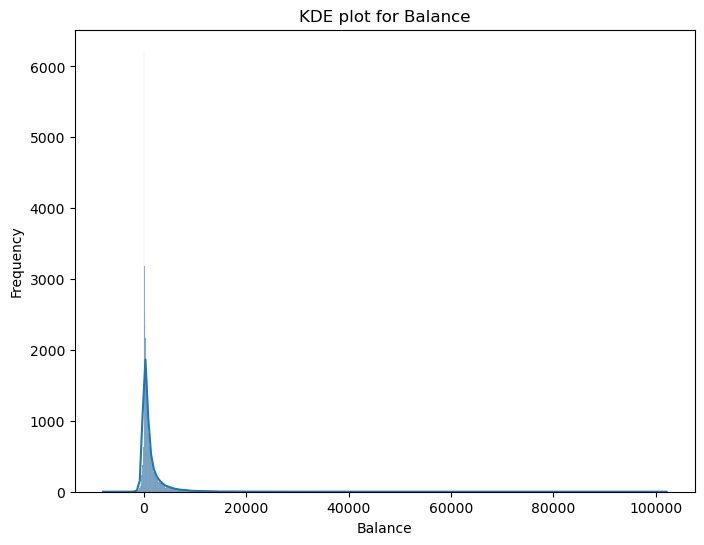


Distribution of balance across education level segmented by marital status:


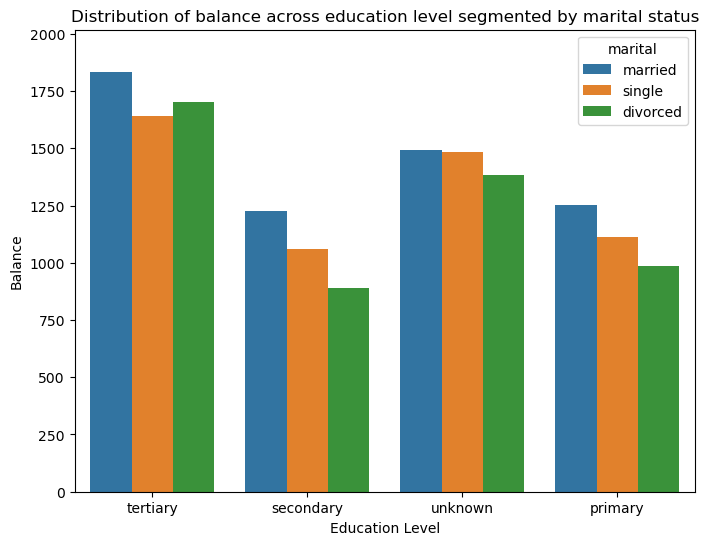


Distribution of duration of last contact:


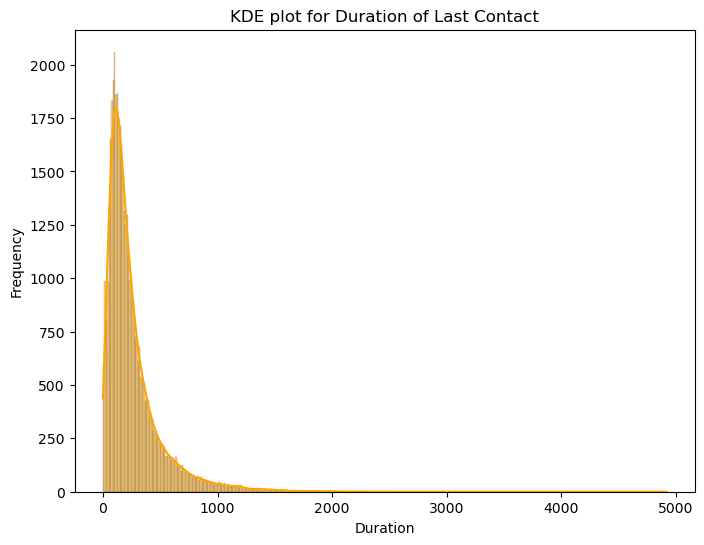


Influence of number of campaigns on client subscription:


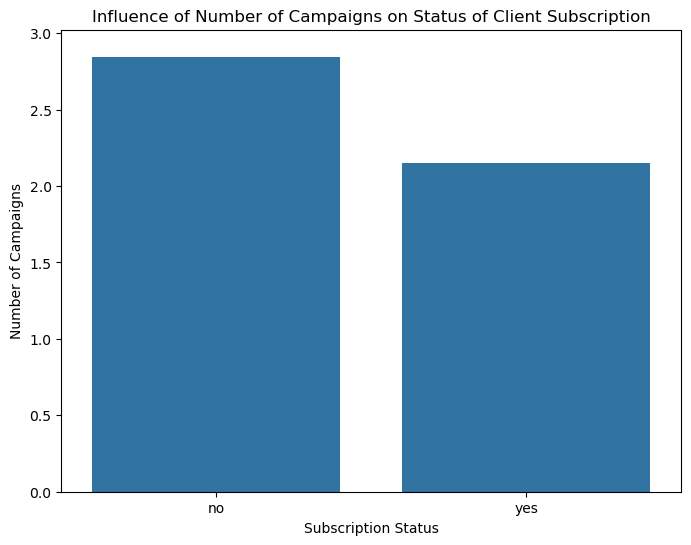


Distribution of the target variable (y):
y
no     39404
yes     5039
Name: count, dtype: int64

Preparing data for machine learning:

Defining the preprocessing steps and logistic regression pipeline:

Training the logistic regression model:

Evaluating the model:
Accuracy of the Model: 89.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7857
           1       0.66      0.29      0.40      1032

    accuracy                           0.90      8889
   macro avg       0.79      0.63      0.67      8889
weighted avg       0.88      0.90      0.88      8889


Confusion Matrix:


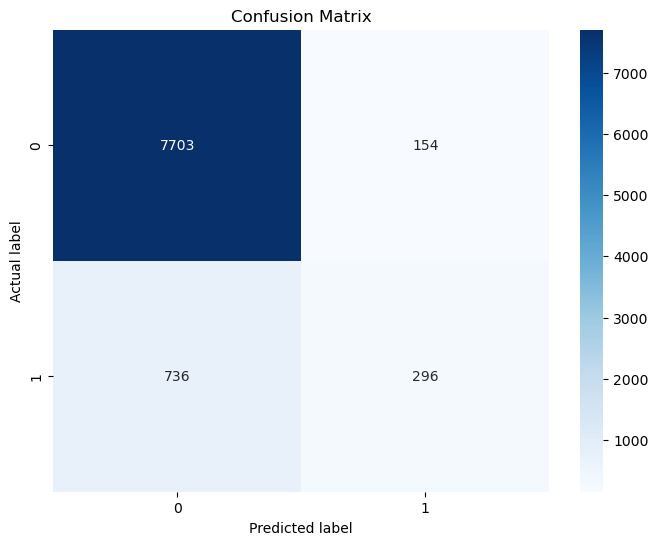


Total Time required (in seconds): 25.64


In [4]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Record the start time for performance measurement
start = time.time()

# Load the dataset
bank = pd.read_csv("G:/TOP-MENTOR/FILES/Sep 1st/Assignments/Logistic Regresssion_prj7/bank-full.csv", delimiter=';')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(bank.head())

# Display the last few rows of the dataset
print("\nLast few rows of the dataset:")
print(bank.tail())

# Data type information
print("\nData types of each column:")
print(bank.dtypes)

# Dataset summary
print("\nDataset info:")
print(bank.info())

# Check for missing values
print("\nMissing values in each column:")
print(bank.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(bank.duplicated().sum())

# Visualize outliers in 'age' and 'balance' columns
print("\nVisualizing outliers in 'age' and 'balance' columns:")
for column in ['age', 'balance']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=bank, x=column)
    plt.title(f"Box plot for {column}")
    plt.xlabel(column)
    plt.show()

# Remove outliers from the 'age' column using the IQR method
print("\nRemoving outliers from 'age' column:")
q1 = bank['age'].quantile(0.25)
q3 = bank['age'].quantile(0.75)
IQR = q3 - q1
upper_threshold = q3 + 1.5 * IQR
lower_threshold = q1 - 1.5 * IQR

# Drop outliers
bank = bank[(bank['age'] >= lower_threshold) & (bank['age'] <= upper_threshold)]

# Visualize the 'age' and 'balance' columns again after outlier removal
print("\nVisualizing 'age' and 'balance' columns after outlier removal:")
for column in ['age', 'balance']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=bank, x=column)
    plt.title(f"Box plot for {column} after outlier removal")
    plt.xlabel(column)
    plt.show()

# Feature engineering
print("\nFeature Engineering:")

# Job column processing
print("\nJob column value counts:")
print(bank['job'].value_counts())
bank = bank[bank['job'] != 'unknown']
print("\nJob column value counts after dropping 'unknown':")
print(bank['job'].value_counts())

# Education column processing
print("\nEducation column value counts:")
print(bank['education'].value_counts())

# Default column processing
print("\nDefault column value counts:")
print(bank['default'].value_counts())

# Balance column visualization
print("\nVisualizing 'balance' column:")
plt.figure(figsize=(8, 6))
sns.histplot(bank['balance'], kde=True)
plt.title('KDE plot for Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Balance across education level segmented by marital status
print("\nDistribution of balance across education level segmented by marital status:")
plt.figure(figsize=(8, 6))
sns.barplot(data=bank, x='education', y='balance', hue='marital', dodge=True, errwidth=0)
plt.title("Distribution of balance across education level segmented by marital status")
plt.xlabel('Education Level')
plt.ylabel('Balance')
plt.show()

# Duration of last contact
print("\nDistribution of duration of last contact:")
plt.figure(figsize=(8, 6))
sns.histplot(bank['duration'], kde=True, color='orange')
plt.title('KDE plot for Duration of Last Contact')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Influence of number of campaigns on client subscription
print("\nInfluence of number of campaigns on client subscription:")
plt.figure(figsize=(8, 6))
sns.barplot(data=bank, x='y', y='campaign', errwidth=0)
plt.title("Influence of Number of Campaigns on Status of Client Subscription")
plt.xlabel('Subscription Status')
plt.ylabel('Number of Campaigns')
plt.show()

# Target variable distribution
print("\nDistribution of the target variable (y):")
print(bank['y'].value_counts())

# Prepare data for machine learning
print("\nPreparing data for machine learning:")
X = bank.drop(columns=['contact', 'day', 'y'])
y = bank['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Label encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define the preprocessing steps and logistic regression pipeline
print("\nDefining the preprocessing steps and logistic regression pipeline:")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['age', 'balance', 'campaign', 'pdays', 'previous']),
        ('cat_ord', OrdinalEncoder(categories=[['unknown', 'primary', 'secondary', 'tertiary'],
                                                ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]), 
         ['education', 'month']),
        ('cat_onehot', OneHotEncoder(sparse_output=False, drop='first'), 
         ['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
    ],
    remainder='passthrough'
)

model = LogisticRegression(max_iter=1000)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Train the model
print("\nTraining the logistic regression model:")
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("\nEvaluating the model:")
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy of the Model: {accuracy:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

# Record the end time and compute the total time taken
end = time.time()
print(f'\nTotal Time required (in seconds): {(end - start):.2f}')
